## Buy and Hold Strategy

In [1]:
import sys
import os

sys.path.append(
    os.path.abspath(
        os.path.join(os.path.dirname(os.path.realpath("__file__")), "..", "..")
    )
)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from bt.algos.flow import RunMonthly
from bt.algos.weighting import WeighSpecified
from bt.algos.portfolio_ops import Rebalance
from bt.core import Strategy
from bt.engine import Backtest

import bt

### Create Fake Index Data

<Axes: >

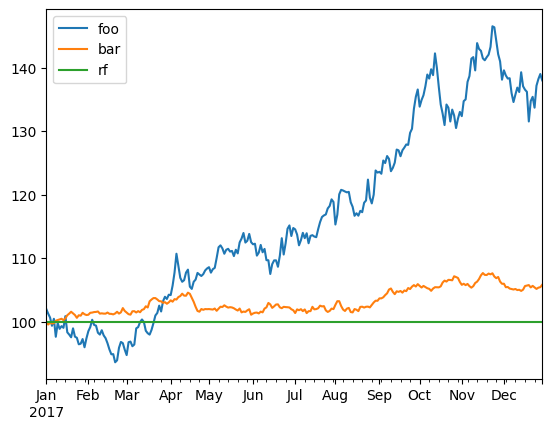

In [3]:
names = ["foo", "bar", "rf"]
dates = pd.date_range(
    start="2017-01-01", end="2017-12-31", freq=pd.tseries.offsets.BDay()
)
n = len(dates)
rdf = pd.DataFrame(np.zeros((n, len(names))), index=dates, columns=names)

np.random.seed(1)
rdf["foo"] = np.random.normal(loc=0.1 / n, scale=0.2 / np.sqrt(n), size=n)
rdf["bar"] = np.random.normal(loc=0.04 / n, scale=0.05 / np.sqrt(n), size=n)
rdf["rf"] = 0.0

pdf = 100 * np.cumprod(1 + rdf)
pdf.plot()

### Build Strategy

In [4]:
runMonthlyAlgo = RunMonthly(run_on_first_date=True)
weights = pd.Series([0.6, 0.4, 0.0], index=rdf.columns)
weighSpecifiedAlgo = WeighSpecified(**weights)
rebalAlgo = Rebalance()

all_algos = [runMonthlyAlgo, weighSpecifiedAlgo, rebalAlgo]

strat = Strategy("static", all_algos)
backtest = Backtest(strat, pdf, integer_positions=False)

### Run Backtest

Note: The logic of the strategy is seperate from the data used in the backtest.

In [5]:
res = bt.run(backtest)

100%|██████████| 1/1 [00:00<00:00, 24.91it/s]


In [6]:
res.stats

,static
start,2017-01-01 00:00:00
end,2017-12-29 00:00:00
rf,0.0
total_return,0.229372
cagr,0.231653
max_drawdown,-0.069257
calmar,3.344851
mtd,-0.000906
three_month,0.005975
six_month,0.142562


In [7]:
res.prices.head()

,static
2017-01-01,100.000000
2017-01-02,100.000000
2017-01-03,99.384719
2017-01-04,99.121677
2017-01-05,98.316364


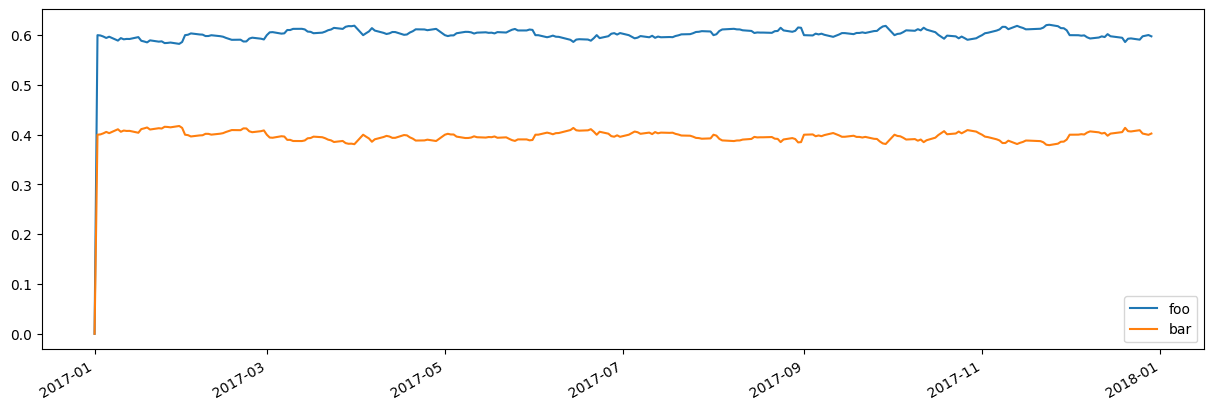

In [8]:
res.plot_security_weights()

Strategy value over time

<Axes: >

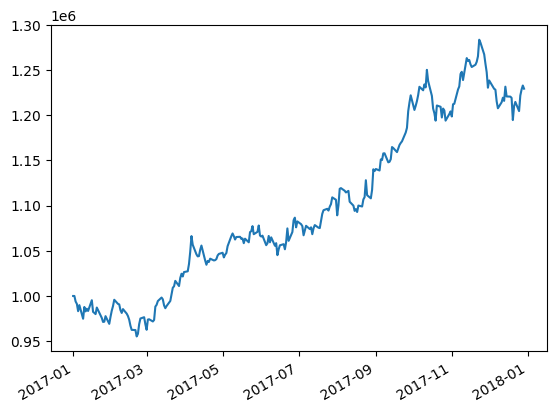

In [9]:
performanceStats = res["static"]
# performance stats is an ffn object
res.backtest_list[0].strategy.values.plot()

Strategy Outlays

Outlays are the total dollar amount spent(gained) by a purchase(sale) of securities.

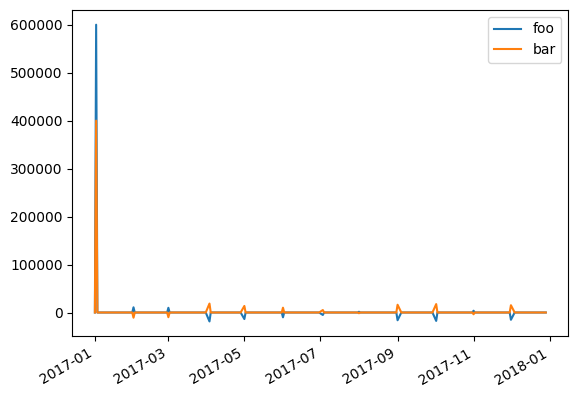

In [10]:
res.backtest_list[0].strategy.outlays.plot();

You can get the change in number of shares purchased a

In [11]:
security_names = res.backtest_list[0].strategy.outlays.columns


res.backtest_list[0].strategy.outlays / pdf.loc[:, security_names]
res.backtest_list[0].positions.diff(1)
res.backtest_list[0].positions

,foo,bar
2017-01-01,0.000000,0.000000
2017-01-02,5879.285683,3998.068018
2017-01-03,5879.285683,3998.068018
2017-01-04,5879.285683,3998.068018
2017-01-05,5879.285683,3998.068018
...,...,...
2017-12-25,5324.589093,4673.239436
2017-12-26,5324.589093,4673.239436
2017-12-27,5324.589093,4673.239436
2017-12-28,5324.589093,4673.239436
